# BUSINESS CASE FOR ITSM

# Data Science PROJECT
# Client: ABC Tech | Category: ITSM - ML
# Project Ref: PM-PR-0012

# Business Case:
* ABC Tech is an mid-size organisation operation in IT-enabled businesssegment over a decade. On an average ABC Tech receives 22-25k IT incidents/tickets , which were handled to best practice ITIL framework with incident management , problem management, change management and configuration management processes. These ITIL practices attained matured process level and a recent audit confirmed that further improvement initiatives may not yield return of investment.
* ABC Tech management is looking for ways to improve the incident management process as recent customer survey results shows that incident management is rated as poor.

# Import Libraries

In [1]:
!pip install --upgrade scikit-learn

In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools
import statsmodels.api as sm
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load The Dataset

In [3]:
data=pd.read_csv(r'C:\Users\user\Downloads\ITSM_data.csv')
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


# Machine Learning as way to improve ITSM processes
### ABC Tech management recently attended Machine Learning conference on ML for ITSM.
### Machine learning looks prospective to improve ITSM processes through prediction and automation. They came up with 4 key areas, where ML can help ITSM process in ABC Tech.
* 1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.
* 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.
* 3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
* 4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

# Basic Checks

In [4]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [5]:
data.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3.0,0.902320,...,NaN,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1.0,SD0147088,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [7]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [8]:
data.dtypes

CI_Name                        object
CI_Cat                         object
CI_Subcat                      object
WBS                            object
Incident_ID                    object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
KB_number                      object
Alert_Status                   object
No_of_Reassignments           float64
Open_Time                      object
Reopen_Time                    object
Resolved_Time                  object
Close_Time                     object
Handle_Time_hrs                object
Closure_Code                   object
No_of_Related_Interactions    float64
Related_Interaction            object
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
Related_Change                 object
dtype: object

In [9]:
data.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [10]:
data.shape

(46606, 25)

In [11]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

# Data Processing / Data Munging
CI Category & CI Subcategory had a lot of labels which were replaced to only take the major ones. Unknown values were replaced by Mode values.

In [12]:
data.CI_Cat.replace(['database'],'storage',inplace=True)
data.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
data.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
data.CI_Cat.replace(np.nan,'application',inplace=True)

In [13]:
data.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
data.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
data.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
data.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [14]:
data.No_of_Related_Interactions.replace(np.nan,1,inplace=True)
data.Priority.replace(np.nan,4,inplace=True)
data.No_of_Related_Incidents.replace(np.nan,0,inplace=True)
data.No_of_Related_Changes.replace(np.nan,0,inplace=True)

# 1. Predicting Priorities

# Feature Selection
Only the features which are available when the tickets arrives can be used to predict priority. Therefore, we have used only 4 predictors.

In [15]:
X = data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = data.Priority

In [16]:
X.head()

,CI_Cat,CI_Subcat,WBS,Category
0,subapplication,Web Based Application,WBS000162,incident
1,application,Web Based Application,WBS000088,incident
2,application,Desktop Application,WBS000092,request for information
3,application,Web Based Application,WBS000088,incident
4,application,Web Based Application,WBS000088,incident


In [17]:
# Label Encoding
enc= LabelEncoder()
for i in (0,1,2,3):
    X.iloc[:,i] = enc.fit_transform(X.iloc[:,i])

In [18]:
# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [19]:
# Standardization technique
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
X_train.shape

(32624, 4)

In [21]:
X_test.shape

(13982, 4)

# Models

# 1. Support Vector Machine

In [22]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train,y_train)

In [23]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [24]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.747604062365899
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.65      0.58       210
         3.0       0.55      0.31      0.39      1581
         4.0       0.72      0.89      0.80      7254
         5.0       0.87      0.68      0.76      4936

    accuracy                           0.75     13982
   macro avg       0.53      0.51      0.51     13982
weighted avg       0.75      0.75      0.74     13982



In [25]:
confusion_matrix(y_test,y_predict_svm)

array([[   0,    0,    0,    1,    0],
       [   0,  137,    8,   56,    9],
       [   0,   36,  486,  958,  101],
       [   0,   78,  314, 6477,  385],
       [   0,   10,   79, 1494, 3353]], dtype=int64)

# 2. Decision Tree

In [26]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test)

In [28]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.8170504934916321
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.69      0.59       210
         3.0       0.66      0.63      0.65      1581
         4.0       0.82      0.87      0.85      7254
         5.0       0.88      0.80      0.84      4936

    accuracy                           0.82     13982
   macro avg       0.58      0.60      0.58     13982
weighted avg       0.82      0.82      0.82     13982



In [29]:
confusion_matrix(y_test,y_predict_dtree)

array([[   0,    0,    0,    1,    0],
       [   0,  144,    6,   43,   17],
       [   0,   42,  999,  419,  121],
       [   0,   80,  458, 6325,  391],
       [   0,   12,   51,  917, 3956]], dtype=int64)

# 3. Random Forest

In [30]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=27)

In [31]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test)

In [32]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.8171220140180232
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.68      0.59       210
         3.0       0.66      0.63      0.64      1581
         4.0       0.82      0.87      0.85      7254
         5.0       0.88      0.80      0.84      4936

    accuracy                           0.82     13982
   macro avg       0.58      0.60      0.58     13982
weighted avg       0.82      0.82      0.82     13982



In [33]:
confusion_matrix(y_test,y_predict_rf)

array([[   0,    0,    0,    1,    0],
       [   0,  142,    7,   44,   17],
       [   0,   39,  994,  424,  124],
       [   0,   79,  457, 6329,  389],
       [   0,   12,   46,  918, 3960]], dtype=int64)

# 4. K-Nearest Neighbor

In [34]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=12,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)

In [35]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [36]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8116149334859104
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.66      0.58       210
         3.0       0.63      0.63      0.63      1581
         4.0       0.81      0.88      0.84      7254
         5.0       0.90      0.78      0.83      4936

    accuracy                           0.81     13982
   macro avg       0.57      0.59      0.58     13982
weighted avg       0.82      0.81      0.81     13982



In [37]:
confusion_matrix(y_test,y_predict_knn)

array([[   0,    0,    0,    1,    0],
       [   0,  138,    9,   45,   18],
       [   0,   37,  991,  429,  124],
       [   0,   79,  487, 6382,  306],
       [   0,   10,   79, 1010, 3837]], dtype=int64)

# 5. Artificial Neural Network

In [38]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
model_mlp.fit(X_train,y_train)

MLPClassifier()

In [39]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [40]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.7650550708053211
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         1
         2.0       0.52      0.65      0.58       210
         3.0       0.60      0.35      0.44      1581
         4.0       0.74      0.90      0.81      7254
         5.0       0.88      0.71      0.79      4936

    accuracy                           0.77     13982
   macro avg       0.55      0.52      0.52     13982
weighted avg       0.77      0.77      0.76     13982



In [41]:
confusion_matrix(y_test,y_predict_mlp)

array([[   0,    0,    0,    1,    0],
       [   0,  137,    6,   57,   10],
       [   0,   36,  551,  887,  107],
       [   0,   78,  304, 6493,  379],
       [   0,   10,   59, 1351, 3516]], dtype=int64)

In [42]:
# Exporting the trained model
joblib.dump(model_rf,'Predicting_Priority.ml')

['Predicting_Priority.ml']

# 2. Predicting Request For Change (RFC)

# Feature Selection

In [43]:
# Selecting the predictors
X1 = data.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data.No_of_Related_Changes

In [44]:
X1.head()

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,Web Based Application,WBS000162,4.0,incident,1.0,2.0
1,Web Based Application,WBS000088,3.0,incident,1.0,1.0
2,Desktop Application,WBS000092,4.0,request for information,1.0,0.0
3,Web Based Application,WBS000088,4.0,incident,1.0,0.0
4,Web Based Application,WBS000088,4.0,incident,1.0,0.0


In [45]:
enc= LabelEncoder()
for i in (0,1,3,4):
    X1.iloc[:,i] = enc.fit_transform(X1.iloc[:,i])

In [46]:
# Splitting into train and test for calculating the accuracy
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

In [47]:
# Standardization technique is used
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [48]:
X1_train.shape

(32624, 6)

In [49]:
X1_test.shape

(13982, 6)

# Models

# 1. Decision Tree

In [50]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model1_dtree=DecisionTreeClassifier()
model1_dtree.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [51]:
# Predicting the model
y1_predict_dtree = model1_dtree.predict(X1_test)

In [52]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_dtree))
print(classification_report(y1_test,y1_predict_dtree))

0.9886997568302103
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13835
         1.0       0.24      0.03      0.05       138
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         0

    accuracy                           0.99     13982
   macro avg       0.25      0.21      0.21     13982
weighted avg       0.98      0.99      0.98     13982



In [53]:
confusion_matrix(y1_test,y1_predict_dtree)

array([[13820,    13,     1,     0,     1],
       [  134,     4,     0,     0,     0],
       [    8,     0,     0,     0,     0],
       [    1,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0]], dtype=int64)

# 2. Random Forest

In [54]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [55]:
# Predicting the model
y1_predict_rf = model1_rf.predict(X1_test)

In [56]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

0.9891288799885567
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13835
         1.0       0.27      0.02      0.04       138
         2.0       0.00      0.00      0.00         8
         3.0       0.00      0.00      0.00         1

    accuracy                           0.99     13982
   macro avg       0.32      0.26      0.26     13982
weighted avg       0.98      0.99      0.98     13982



In [57]:
confusion_matrix(y1_test,y1_predict_rf)

array([[13827,     8,     0,     0],
       [  135,     3,     0,     0],
       [    8,     0,     0,     0],
       [    1,     0,     0,     0]], dtype=int64)

In [58]:
# Exporting the trained model
joblib.dump(model1_dtree,'Predict_RFC.ml')

['Predict_RFC.ml']

# 3. Forecasting the Incident Volume

In [59]:
# Imporing the necessary columns
incfrq = data.loc[:,['Incident_ID','Open_Time']]

In [60]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


## Data Processing / Data Munging

In [61]:
# Coverting all the values in proper Datetime format
for i in range(len(incfrq.Open_Time)):
    if (incfrq.Open_Time[i][1]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    elif (incfrq.Open_Time[i][2]=='/'):
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d/%m/%Y %H:%M').date()
    else:
        incfrq.Open_Time[i] = dt.datetime.strptime(incfrq.Open_Time[i],'%d-%m-%Y %H:%M').date()

In [62]:
incfrq.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


In [63]:
# Adding a new column which will have the number of tickets per day
incfrq['No_Incidents'] = incfrq.groupby('Open_Time')['Incident_ID'].transform('count')

In [64]:
incfrq.drop(['Incident_ID'],axis=1,inplace=True)
incfrq.drop_duplicates(inplace=True)

In [65]:
incfrq.head()

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [66]:
# Setting Date as the Index
incfrq = incfrq.set_index('Open_Time')
incfrq.index = pd.to_datetime(incfrq.index)
incfrq.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [67]:
incfrq.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [68]:
# Checking range of dates for our values
print(incfrq.index.min(),'to',incfrq.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [69]:
# Making a new Series with frequency as Day
data1 = incfrq['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [70]:
data1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

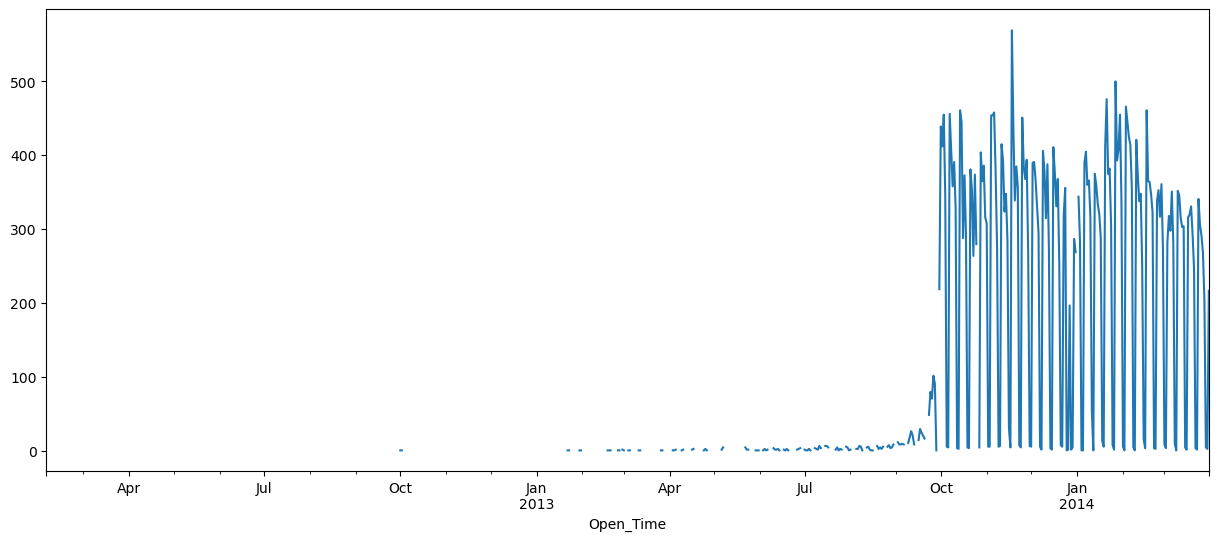

In [71]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

# Our Insights:
* As We can see in this graph the tickets started to increased from 2013
* before 2013 their is no tickets increaments 

In [72]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = incfrq[incfrq.index > dt.datetime(2013,10,1)]

In [73]:
incfrom2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [74]:
# new Series
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

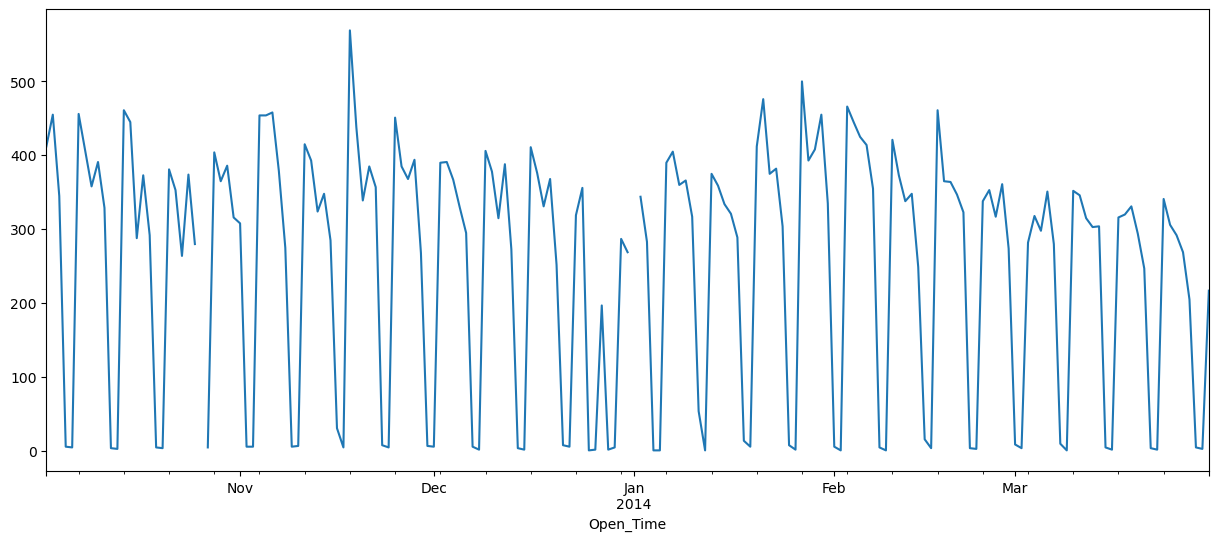

In [75]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

# Our Insigths:
* As we sawed on top the total tickets per day but in this graph we can see the tickets 
* in this we have taken only 2014 tickets 
* in this graph we can see the tickets are more in month of november end and december starting its almost crossed 500
* in month of jan we can see tickets is reduced almost its less then 200

In [76]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [77]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.785382472242
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.136333805366
ARIMA(1, 0, 0) - AIC:2365.291646936565
ARIMA(1, 0, 1) - AIC:2337.312508693354
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.431581243656


In [78]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.741      2.576      0.010    6023.495    4.44e+04


In [79]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

# Visualization

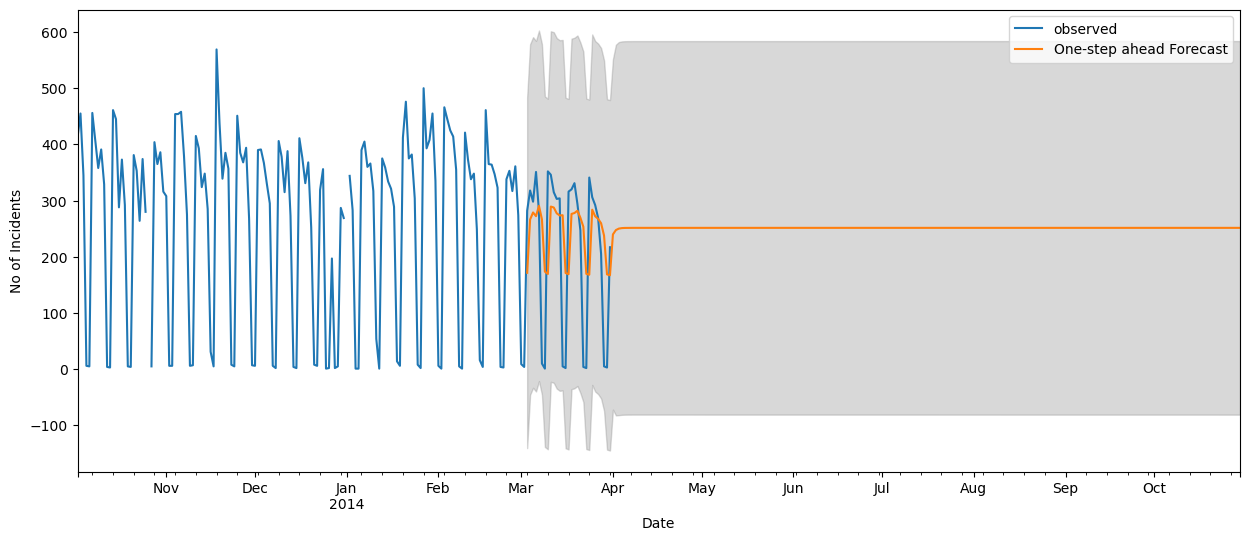

In [80]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

# Our Insights:
* The graph shows here for visualization 
* in this we have mentioned the date and the no of incidents happened in months 

# Model Comparison Report

* For This ITPL Dataset We Have used Machine learning and deep learning models during their implementation of this project implementation. Some of these models are K-Nearest neighbor (KNN), Decision tree, Support vector machine (SVM), and many more.¶
* In This We Have Built Two Predicting Models in That We have implemented some meodels 
* After Completion Of Project We Would Like To Suggests Decision Tree And Random Forest

# Report on Challenges faced
## The challenges we faced during this project are as follows:
* The ITPL Dataset Is A huge Dataset 
* The dataset contained lots of extreme outliers in some features of the dataset which was giving us incorrect results; we had   to handle these outliers by making a separate function and run the function on those features.
* In This Project We Have Predicted Two Types 

# Conclusion

 * the integration of machine learning within the Information Technology Project Lifecycle (ITPL) represents a pivotal step forward in our organization's pursuit of innovation, efficiency, and competitive advantage. By infusing machine learning capabilities into our project management processes, we are not merely embracing a technological trend, but strategically positioning ourselves to harness the power of data-driven insights and automation.

* The utilization of machine learning within ITPL promises to revolutionize how we approach project planning, execution, and optimization. The predictive analytics offered by machine learning algorithms will empower us to make informed decisions, identify potential risks, and allocate resources with a precision that was previously unattainable. This predictive prowess will not only enhance the accuracy of project timelines but also contribute to a proactive risk management strategy, reducing unforeseen challenges and delays.

* Furthermore, the automation capabilities inherent in machine learning will significantly streamline routine tasks, freeing up valuable human resources to focus on more complex and creative aspects of project delivery. This operational efficiency, coupled with the ability to adapt and learn from historical project data, positions us to drive continuous improvement and innovation in our project management practices.

* From a strategic perspective, the integration of machine learning into ITPL aligns seamlessly with our commitment to staying at the forefront of technological advancements. It signals to stakeholders, clients, and competitors alike that we are dedicated to leveraging cutting-edge technologies to deliver superior project outcomes. This not only enhances our brand image but also opens up new avenues for business growth and client satisfaction.

* In essence, the integration of machine learning within the ITPL framework is not just a technological upgrade; it is a strategic imperative that propels us into a future where data-driven insights and intelligent automation are indispensable components of successful project management. Through this initiative, we position ourselves to be leaders in our industry, driving innovation, reducing costs, and delivering projects with unparalleled efficiency. The benefits far outweigh the costs, making this endeavor a cornerstone of our journey towards a more agile, adaptive, and technologically advanced organization."